# Preparation

In [1]:
# !pip install pandas
# !pip install matplotlib

# Import libraries
import pandas as pd

from Utils import *

### Global Parameters

In [2]:
# Specify the data path
datafile = '../data/static-multimap-data.csv'

output_keys = ['Benchmark', 'Label', 'Distribution', 'MatchingRate', 'Multiplicity', \
               'NumInputs', 'Occupancy', 'GPU Time (sec)', 'Elem/s (elem/sec)']

### Import Data

In [3]:
# Read csv file
rawdf = pd.read_csv(datafile)

# Filter out skipped tests
perfdf = rawdf[rawdf["Key"] == rawdf["Value"]].reset_index(drop=True)


# Add labels
perfdf['Label'] = perfdf["Key"]
perfdf.loc[perfdf['Distribution'].notnull(), 'Label'] += "_" + perfdf['Distribution']

# Trim data frame for visualization
perfdf = perfdf[output_keys]

# Visualization

### Visualization Parameters

In [4]:
# Get benchmark list
unique_bms = perfdf["Benchmark"].unique()
for it in unique_bms:
    print(it)

staic_multimap_insert_uniform_multiplicity
staic_multimap_insert_occupancy
staic_multimap_count_uniform_multiplicity
staic_multimap_count_occupancy
staic_multimap_retrieve_uniform_multiplicity
staic_multimap_retrieve_occupancy
staic_multimap_retrieve_matching_rate
staic_multimap_query_uniform_multiplicity
staic_multimap_query_occupancy
staic_multimap_query_matching_rate
staic_multimap_count_matching_rate


### `insert` performance by varying key muliplicities
<ul>
<li>100'000'000 insertions</li>
<li>Fixed matching rate: 0.5</li>
<li>Fixed occupancy: 0.8</li>
<li>UNIFORM distribution</li>
</ul>

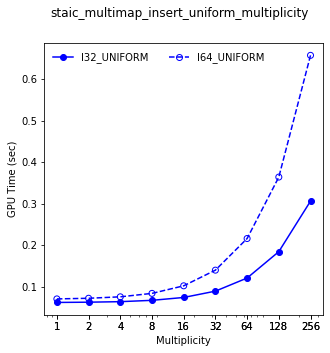

In [5]:
for bm in unique_bms:
    flag = "staic_multimap_insert_uniform_multiplicity" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_single_perf(bm, tmpdf, "Multiplicity", unique_labels)

### `insert` performance by varying occupancies
<ul>
<li>100'000'000 insertions</li>
<li>Fixed matching rate: 0.5</li>
</ul>

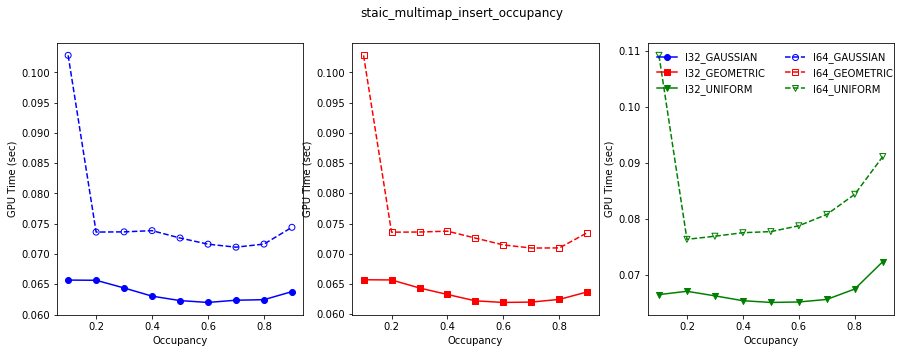

In [6]:
for bm in unique_bms:
    flag = "staic_multimap_insert_occupancy" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_dual_perf(bm, tmpdf, "Occupancy", unique_labels)

### `count` performance by varying key muliplicities
<ul>
<li>100'000'000 key/value pairs inserted</li>
<li>100'000'000 probing keys</li>
<li>Fixed matching rate: 0.5</li>
<li>Fixed occupancy: 0.8</li>
<li>UNIFORM distribution</li>
</ul>

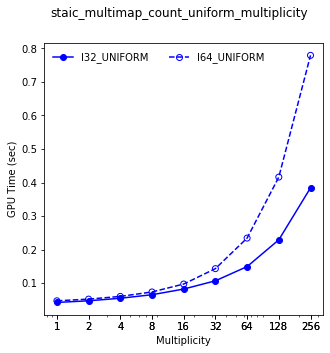

In [7]:
for bm in unique_bms:
    flag = "staic_multimap_count_uniform_multiplicity" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_single_perf(bm, tmpdf, "Multiplicity", unique_labels)

### `count` performance by varying occupancies
<ul>
<li>100'000'000 key/value pairs inserted</li>
<li>100'000'000 probing keys</li>
<li>Fixed matching rate: 0.5</li>
</ul>

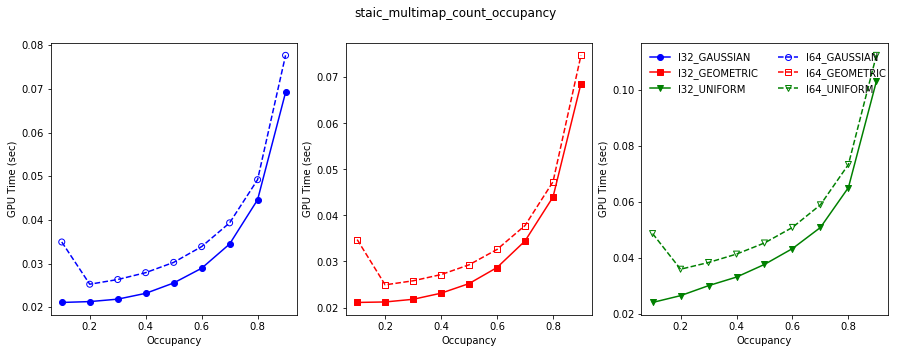

In [8]:
for bm in unique_bms:
    flag = "staic_multimap_count_occupancy" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_dual_perf(bm, tmpdf, "Occupancy", unique_labels)

### `count` performance by varying matching rates
<ul>
<li>100'000'000 key/value pairs inserted</li>
<li>100'000'000 probing keys</li>
<li>Fixed matching rate: 0.5</li>
</ul>

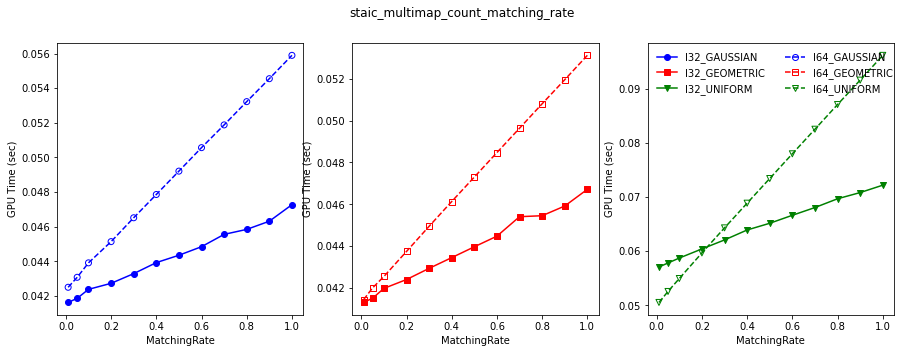

In [9]:
for bm in unique_bms:
    flag = "staic_multimap_count_matching_rate" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_dual_perf(bm, tmpdf, "MatchingRate", unique_labels)

### `retrieve` performance by varying key muliplicities
<ul>
<li>100'000'000 key/value pairs inserted</li>
<li>100'000'000 probing keys</li>
<li>Fixed matching rate: 0.5</li>
<li>Fixed occupancy: 0.8</li>
<li>UNIFORM distribution</li>
</ul>

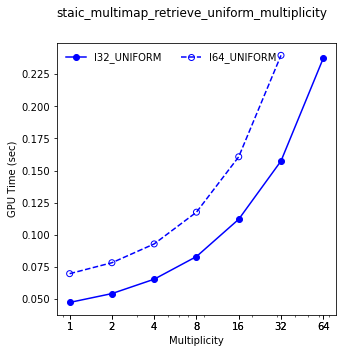

In [10]:
for bm in unique_bms:
    flag = "staic_multimap_retrieve_uniform_multiplicity" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_single_perf(bm, tmpdf, "Multiplicity", unique_labels)

### `retrieve` performance by varying occupancies
<ul>
<li>100'000'000 key/value pairs inserted</li>
<li>100'000'000 probing keys</li>
<li>Fixed matching rate: 0.5</li>
</ul>

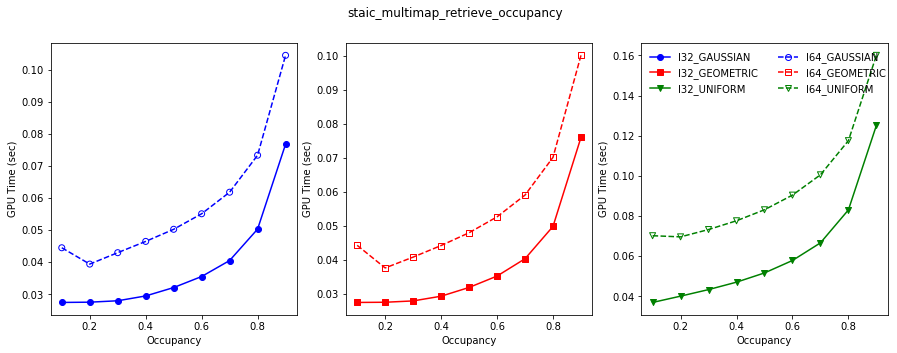

In [11]:
for bm in unique_bms:
    flag = "staic_multimap_retrieve_occupancy" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_dual_perf(bm, tmpdf, "Occupancy", unique_labels)

### `retrieve` performance by varying matching rates
<ul>
<li>100'000'000 key/value pairs inserted</li>
<li>100'000'000 probing keys</li>
<li>Fixed matching rate: 0.5</li>
</ul>

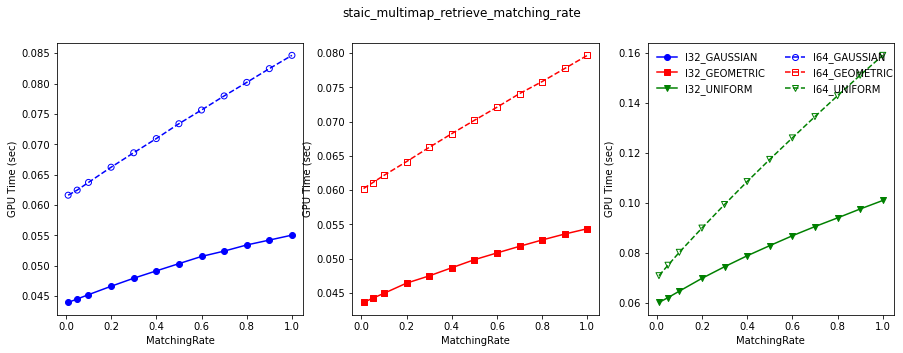

In [12]:
for bm in unique_bms:
    flag = "staic_multimap_retrieve_matching_rate" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_dual_perf(bm, tmpdf, "MatchingRate", unique_labels)

### `query` (`retrieve`  + `count`) performance by varying key muliplicities
<ul>
<li>100'000'000 key/value pairs inserted</li>
<li>100'000'000 probing keys</li>
<li>Fixed matching rate: 0.5</li>
<li>Fixed occupancy: 0.8</li>
<li>UNIFORM distribution</li>
</ul>

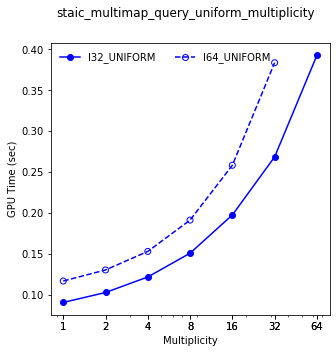

In [13]:
for bm in unique_bms:
    flag = "staic_multimap_query_uniform_multiplicity" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_single_perf(bm, tmpdf, "Multiplicity", unique_labels)

### `query` (`retrieve`  + `count`) performance by varying occupancies
<ul>
<li>100'000'000 key/value pairs inserted</li>
<li>100'000'000 probing keys</li>
<li>Fixed matching rate: 0.5</li>
</ul>

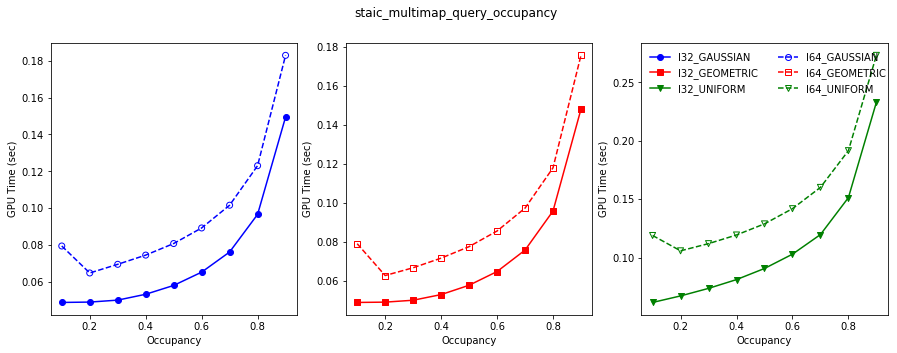

In [14]:
for bm in unique_bms:
    flag = "staic_multimap_query_occupancy" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_dual_perf(bm, tmpdf, "Occupancy", unique_labels)

### `query` (`retrieve`  + `count`) performance by varying matching rates
<ul>
<li>100'000'000 key/value pairs inserted</li>
<li>100'000'000 probing keys</li>
<li>Fixed matching rate: 0.5</li>
</ul>

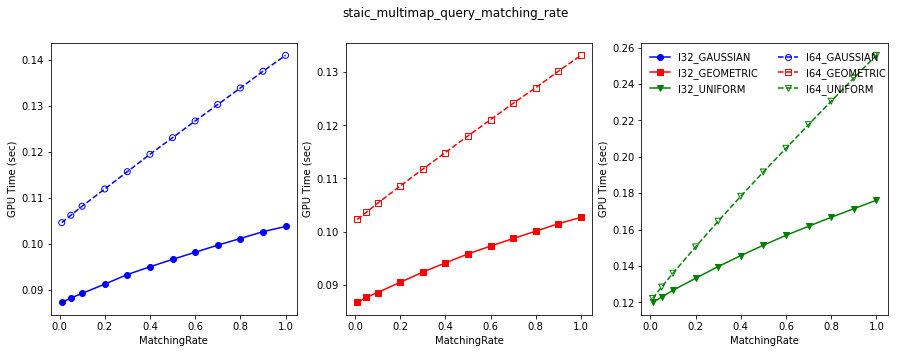

In [15]:
for bm in unique_bms:
    flag = "staic_multimap_query_matching_rate" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_dual_perf(bm, tmpdf, "MatchingRate", unique_labels)